<div style="text-align: center;">
  <h1><b>Exploratory Study on Filipino Household Income and Expenditure</b></h1>
  <h4>Prepared by: Khristian F. Rodas & James Patrick De Mesa | BSIT 3B</h4>
  <h4>Submitted for the subject: ITD – Data Mining</h4>
  <hr>
</div>


<div style="text-align: justify">
  The data in this project comes from the Family Income and Expenditure Survey (FIES), which is run every three years by the Philippine Statistics Authority (PSA). The survey collects detailed information about how Filipino families earn and spend their money, including different types of expenses, where their income comes from (both in cash and other forms), and other factors that affect how households manage their finances.
  <br><br>
  This dataset has over 40,000 entries and about 60 columns, mostly related to household income and spending. For this analysis, we’ll be using Python libraries like <b>pandas</b>, <b>seaborn</b>, <b>matplotlib</b>, and <b>numpy</b> to explore the data.
</div>

In [17]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')
from IPython.display import Image

In [2]:
income = pd.read_csv("dataset/Family Income and Expenditure.csv")
income

Total Household Income              Region  Total Food Expenditure  \
0                      480332                 CAR                  117848   
1                      198235                 CAR                   67766   
2                       82785                 CAR                   61609   
3                      107589                 CAR                   78189   
4                      189322                 CAR                   94625   
...                       ...                 ...                     ...   
41539                  119773  XII - SOCCSKSARGEN                   44875   
41540                  137320  XII - SOCCSKSARGEN                   31157   
41541                  133171  XII - SOCCSKSARGEN                   45882   
41542                  129500  XII - SOCCSKSARGEN                   81416   
41543                  128598  XII - SOCCSKSARGEN                   78195   

            Main Source of Income  Agricultural Household indicator  \
0                   Wage/Salaries                                 0   
1                   Wage/Salaries                                 0   
2                   Wage/Salaries                                 1   
3                   Wage/Salaries                                 0   
4                   Wage/Salaries                                 0   
...                           ...                               ...   
41539  Enterpreneurial Activities                                 1   
41540  Enterpreneurial Activities                                 1   
41541  Enterpreneurial Activities                                 2   
41542  Enterpreneurial Activities                                 1   
41543  Enterpreneurial Activities                                 1   

       Bread and Cereals Expenditure  Total Rice Expenditure  \
0                              42140                   38300   
1                              17329                   13008   
2                              34182                   32001   
3                              34030                   28659   
4                              34820                   30167   
...                              ...                     ...   
41539                          23675                   21542   
41540                           2691                    1273   
41541                          28646                   27339   
41542                          29996                   26655   
41543                          43485                   41205   

       Meat Expenditure  Total Fish and  marine products Expenditure  \
0                 24676                                        16806   
1                 17434                                        11073   
2                  7783                                         2590   
3                 10914                                        10812   
4                 18391                                        11309   
...                 ...                                          ...   
41539              1476                                         6120   
41540              1886                                         4386   
41541               480                                         4796   
41542              2359                                        17730   
41543              1985                                         7735   

       Fruit Expenditure  ...  Number of Refrigerator/Freezer  \
0                   3325  ...                               1   
1                   2035  ...                               0   
2                   1730  ...                               0   
3                    690  ...                               0   
4                   1395  ...                               1   
...                  ...  ...                             ...   
41539               1632  ...                               0   
41540               1840  ...                               0   
41541     

# Understanding Regional Income Sources
We begin by identifying the most common sources of income for Filipino households in each region. This helps us understand how people make a living and the dominant economic activities in different parts of the country.

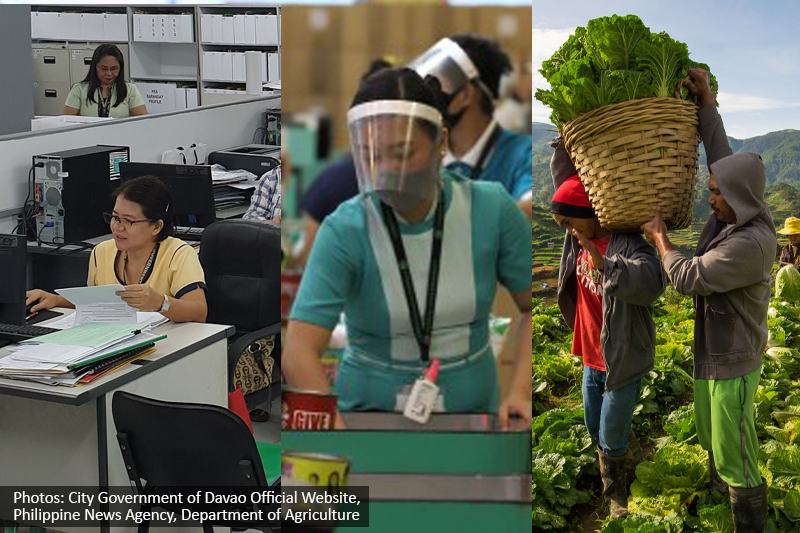

In [19]:
Image(filename='images/income_source.jpg')

### Q1. What are the primary sources of income in all regions in the Philippines?

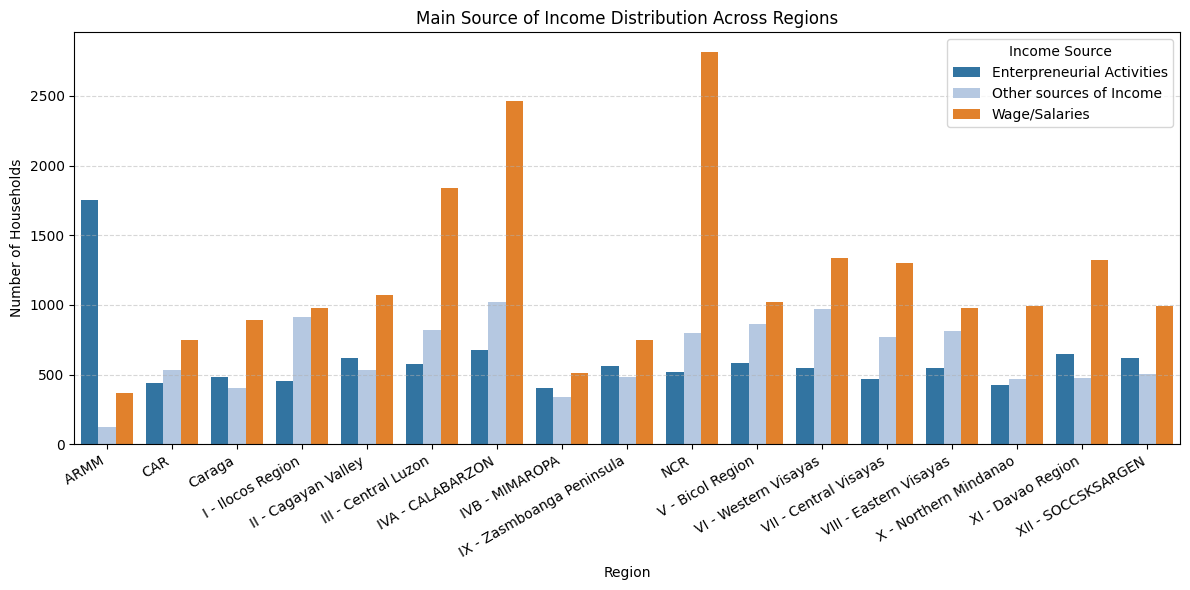

In [3]:
region_income_counts = income.groupby(['Region', 'Main Source of Income']).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
sns.barplot(
    x="Region", 
    y="Count", 
    hue="Main Source of Income", 
    data=region_income_counts, 
    palette="tab20"
)
plt.title("Main Source of Income Distribution Across Regions")
plt.xlabel("Region")
plt.ylabel("Number of Households")
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.legend(title="Income Source")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Insight 1:
Most Filipino households earn primarily through <b>wages and salaries</b>, especially in more urbanized regions like <b>National Capital Region (NCR)</b>, <b>CALABARZON</b>, and <b>Central Luzon</b>. On the other hand, regions such as <b>ARMM</b> (now known as BARMM) show a notable presence of households relying on <b>entrepreneurial activities</b>, suggesting a lack of formal employment opportunities and a higher reliance on small-scale businesses or farming.

<hr style="height:5px;border-width:0;color:gray;background-color:gray">

# Mapping Regional Income Differences
Next, we explore how household income varies across regions. This allows us to see where people earn more or less and may reflect the availability of jobs, cost of living, or economic development in each region.

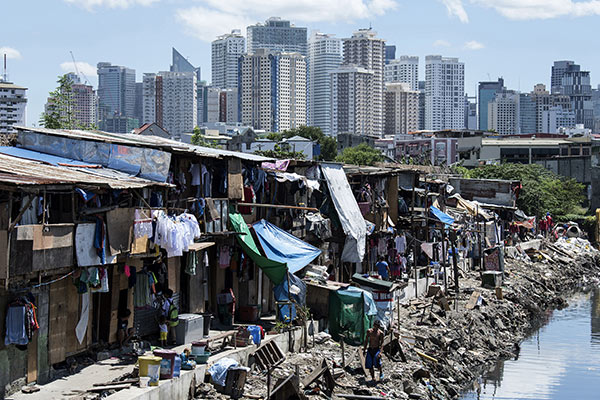

In [20]:
Image(filename='images/Insight 2.jpg')

### Q2. What is the average total household income per region?

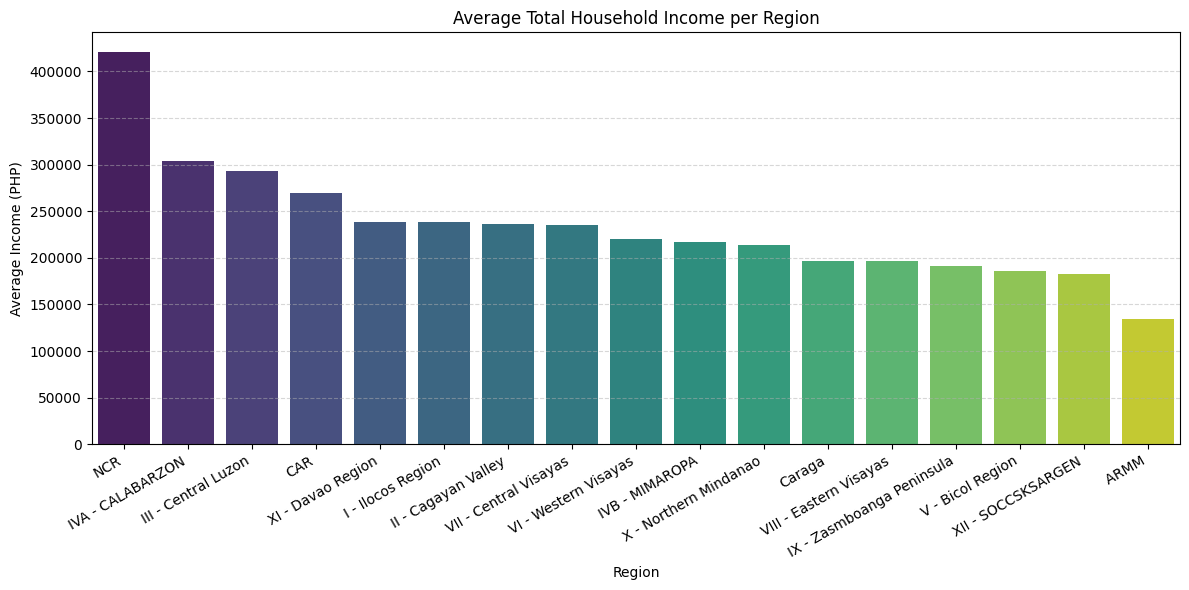

In [4]:
avg_income_per_region = income.groupby("Region")["Total Household Income"].mean().reset_index()
avg_income_per_region = avg_income_per_region.sort_values(by="Total Household Income", ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(
    x="Region",
    y="Total Household Income",
    data=avg_income_per_region,
    palette="viridis"
)
plt.title("Average Total Household Income per Region")
plt.xlabel("Region")
plt.ylabel("Average Income (PHP)")
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Insight 2:
Regions such as the <b>National Capital Region (NCR)</b> and <b>CALABARZON</b> report the highest average household income, which aligns with their status as major economic hubs. Meanwhile, regions like <b>ARMM/BARMM</b> and <b>Region IX</b> tend to have lower averages, highlighting ongoing regional income disparities across the country.


<hr style="height:5px;border-width:0;color:gray;background-color:gray">

# How Much Is Spent on Food?
Food is a basic necessity and a major household expense. By looking at average food spending in each region, we get a clearer picture of household priorities and local food costs.

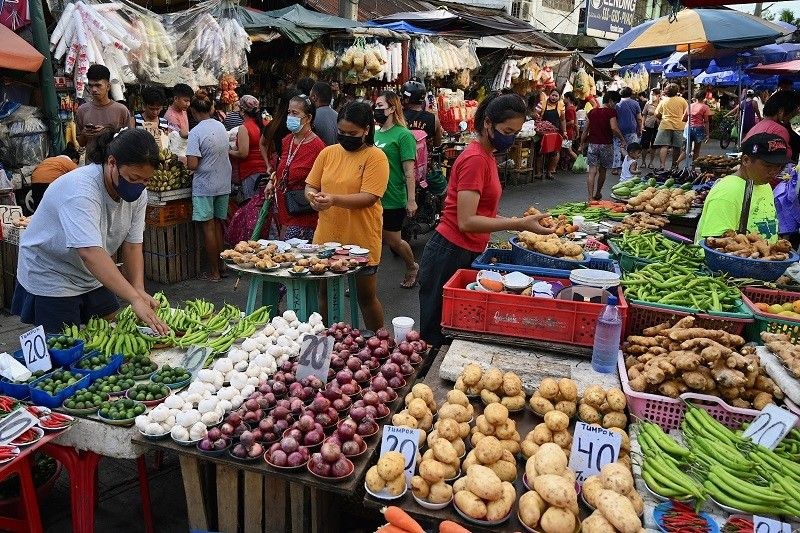

In [21]:
Image(filename='images/Insight 3.jpg')

### Q3. What is the average total food expenditure per region?

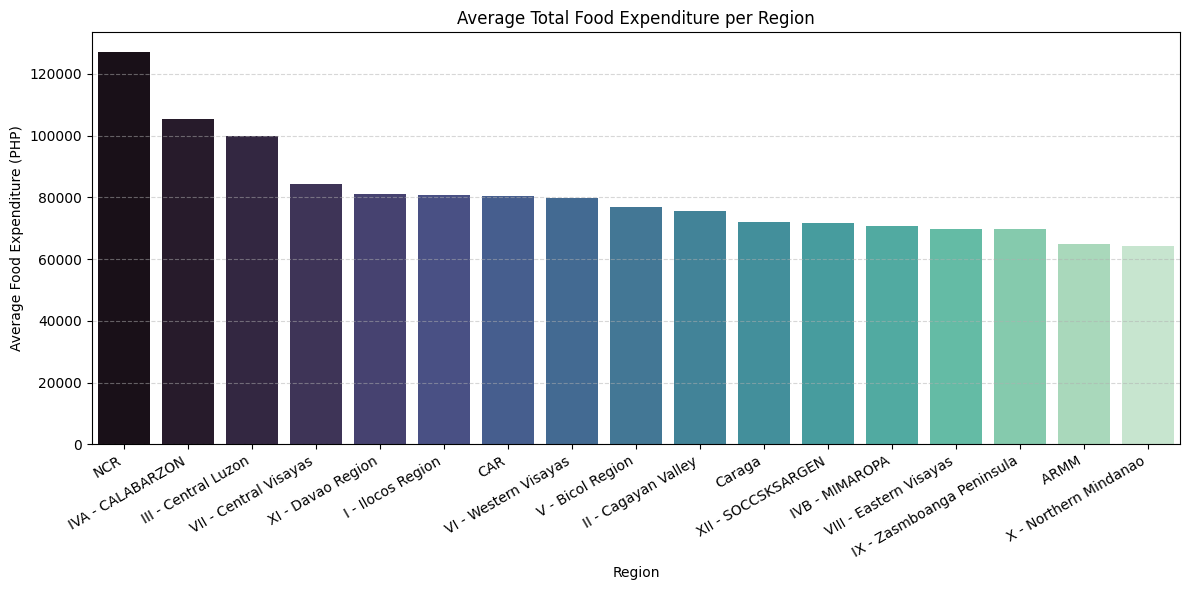

In [5]:
avg_food_exp = income.groupby("Region")["Total Food Expenditure"].mean().reset_index()
avg_food_exp = avg_food_exp.sort_values(by="Total Food Expenditure", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    x="Region",
    y="Total Food Expenditure",
    data=avg_food_exp,
    palette="mako"
)
plt.title("Average Total Food Expenditure per Region")
plt.xlabel("Region")
plt.ylabel("Average Food Expenditure (PHP)")
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Insight 3:
Households in wealthier and more urbanized regions like <b>NCR</b> and <b>CALABARZON</b> tend to spend more on food, which is expected given their higher incomes and higher cost of living. Regions with lower income levels, such as <b>BARMM</b> and <b>Region VIII</b>, spend less on food on average, potentially due to both affordability constraints and different dietary patterns.

<hr style="height:5px;border-width:0;color:gray;background-color:gray">

# The Cost of a Staple: Rice
Rice is a daily essential for most Filipino households. Analyzing rice expenditure helps us understand both affordability and regional price differences for this staple food.

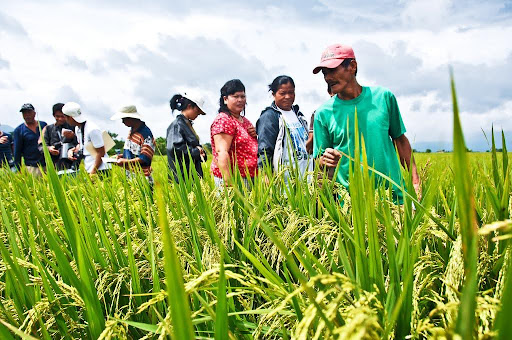

In [22]:
Image(filename='images/Insight 4.jpg')

### Q4. What is the average household expenditure on rice across different regions?

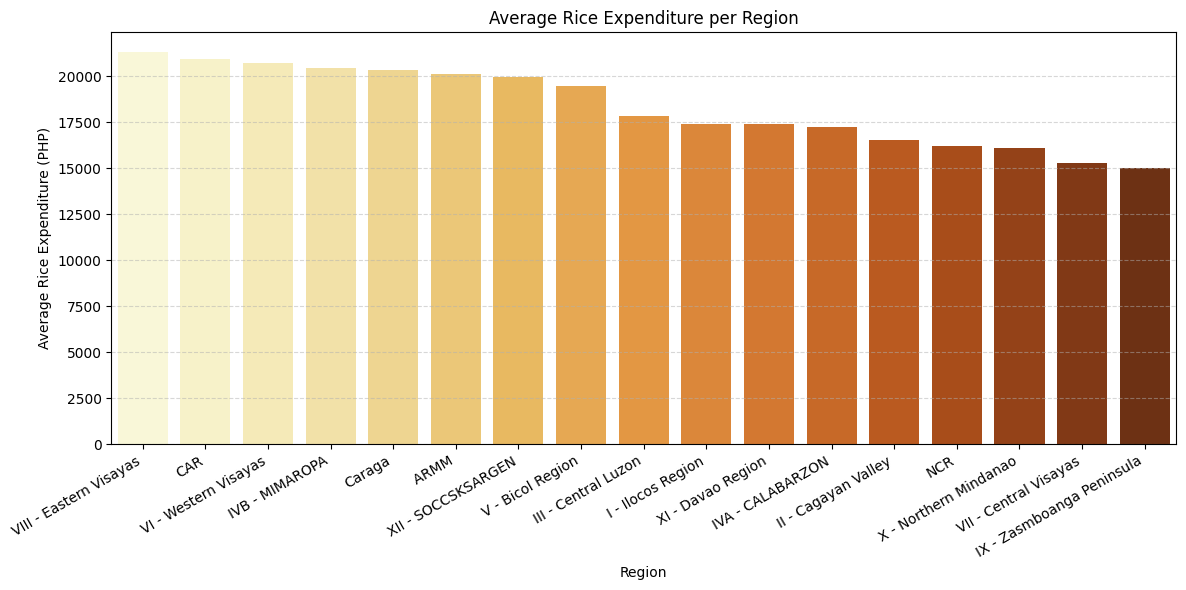

In [6]:
# Calculate average rice expenditure per region
avg_rice_exp = income.groupby("Region")["Total Rice Expenditure"].mean().reset_index()
avg_rice_exp = avg_rice_exp.sort_values(by="Total Rice Expenditure", ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(
    x="Region",
    y="Total Rice Expenditure",
    data=avg_rice_exp,
    palette="YlOrBr"
)
plt.title("Average Rice Expenditure per Region")
plt.xlabel("Region")
plt.ylabel("Average Rice Expenditure (PHP)")
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Insight 4:
Regions such as <b>CAR</b> and <b>Region VIII</b> show higher rice expenditure, possibly due to larger household sizes or location which farming is their main source of income. Surprisingly, <b>NCR</b> has moderate rice expenses despite high income—suggesting either smaller household sizes or more diverse food consumption. Rice remains a major part of the Filipino diet nationwide.

<hr style="height:5px;border-width:0;color:gray;background-color:gray">

# Family Size and Income
We investigate whether the number of family members affects total household income. Larger families may have more income earners—or more dependents—so this relationship is worth exploring.

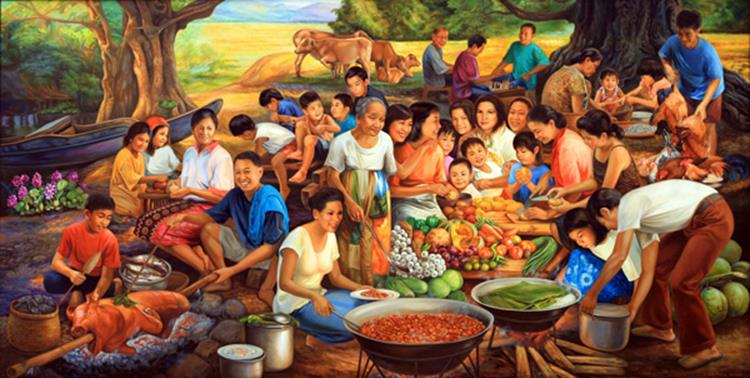

In [23]:
Image(filename='images/Insight 5.jpg')

### Q5. What is the relationship between household income and the number of family members?

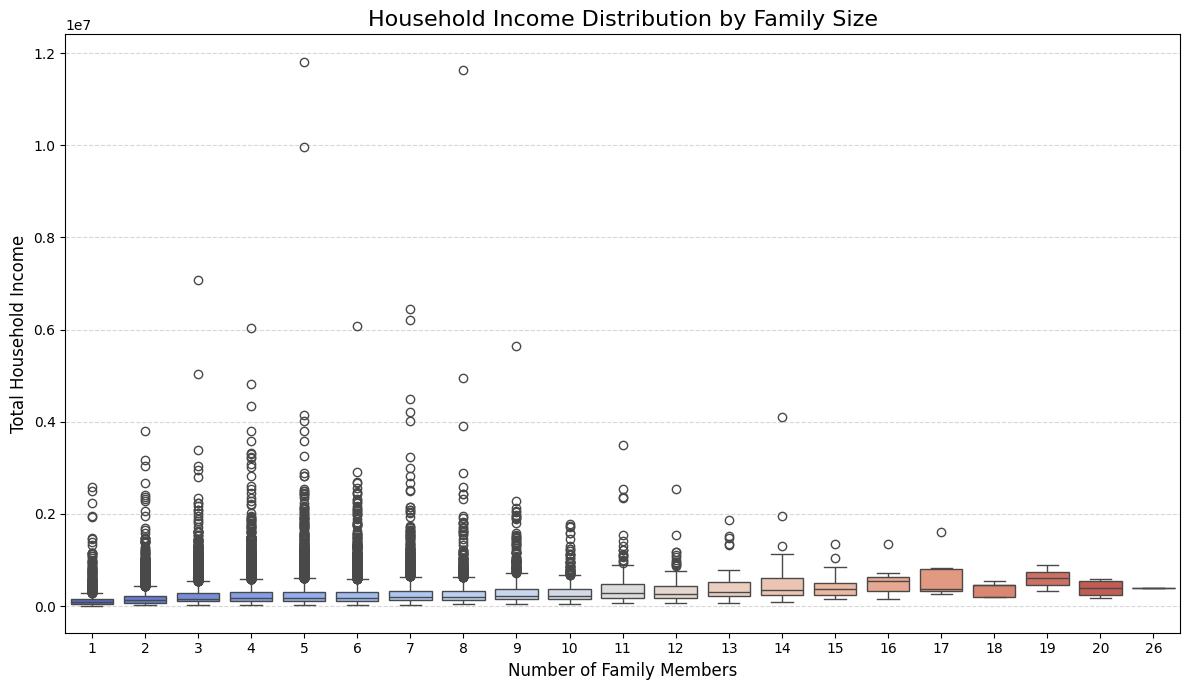

In [16]:
avg_income = income_vs_family_size.groupby("Total Number of Family members")["Total Household Income"].mean().reset_index()

plt.figure(figsize=(12, 7))
sns.boxplot(
    x="Total Number of Family members", 
    y="Total Household Income", 
    data=income_vs_family_size, 
    palette="coolwarm"
)

plt.title("Household Income Distribution by Family Size", fontsize=16)
plt.xlabel("Number of Family Members", fontsize=12)
plt.ylabel("Total Household Income", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Insight 5:
Most households have between <b>3 to 6</b> members. While income varies greatly, there's no strong direct correlation, some large families earn less while others earn more. However, households with fewer members are often observed across all income levels, showing that family size alone doesn’t determine income level.

<hr style="height:5px;border-width:0;color:gray;background-color:gray">

# Income by Age of the Household Head
Does age bring financial stability? We explore how the age of the household head affects income, which may reflect job experience, retirement, or access to employment.

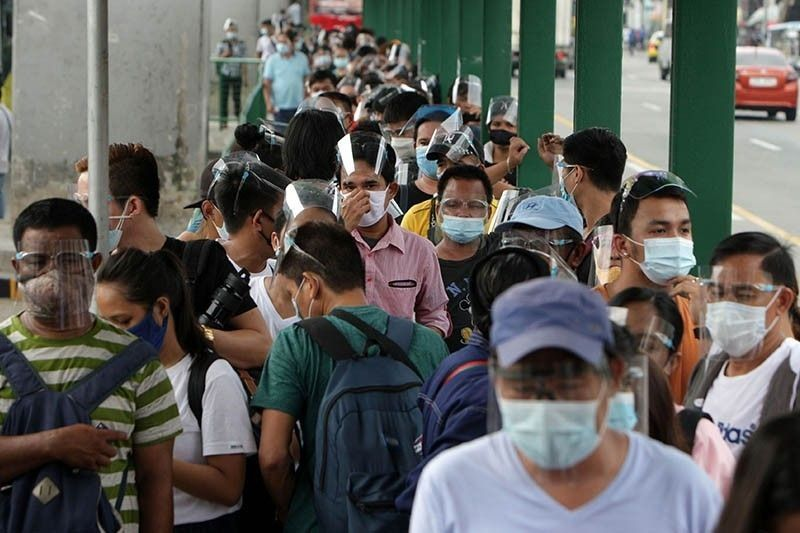

In [24]:
Image(filename='images/Insight 6.jpg')

### Q6. How does the household head's age affect the total household income?

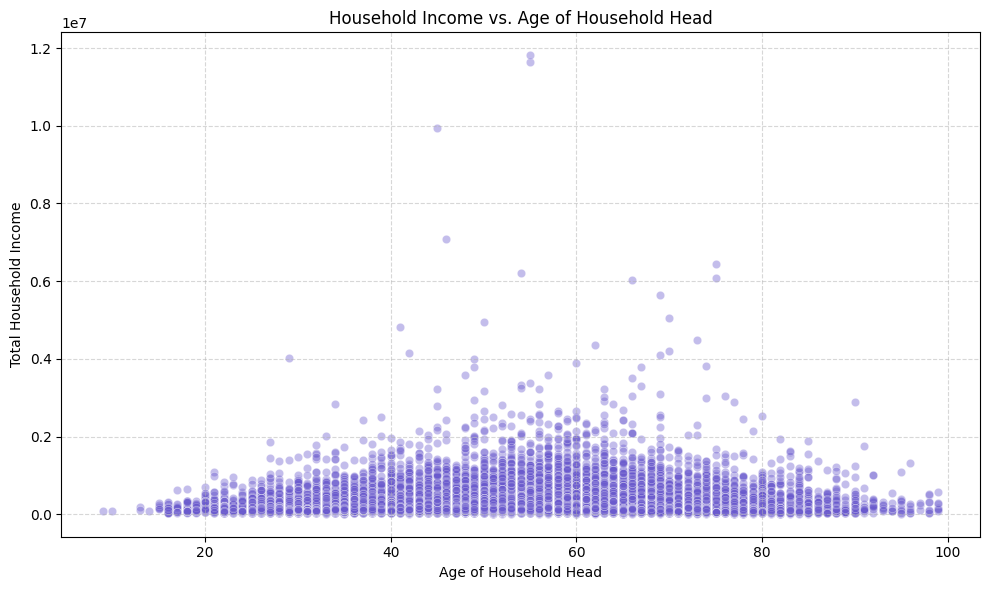

In [8]:
income_vs_age = income[["Household Head Age", "Total Household Income"]]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="Household Head Age",
    y="Total Household Income",
    data=income_vs_age,
    alpha=0.4,
    color="slateblue"
)
plt.title("Household Income vs. Age of Household Head")
plt.xlabel("Age of Household Head")
plt.ylabel("Total Household Income")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Insight 6
Household heads in the <b>30 to 60</b> age range generally earn more, likely because they are in their prime working years. Income tends to be lower for very young and older household heads, which aligns with expected career stages, starting out or nearing retirement.

<hr style="height:5px;border-width:0;color:gray;background-color:gray">

# Where Is Income the Highest?
Some regions offer better job opportunities and higher wages. This question looks at where people earn the most and least across the country.

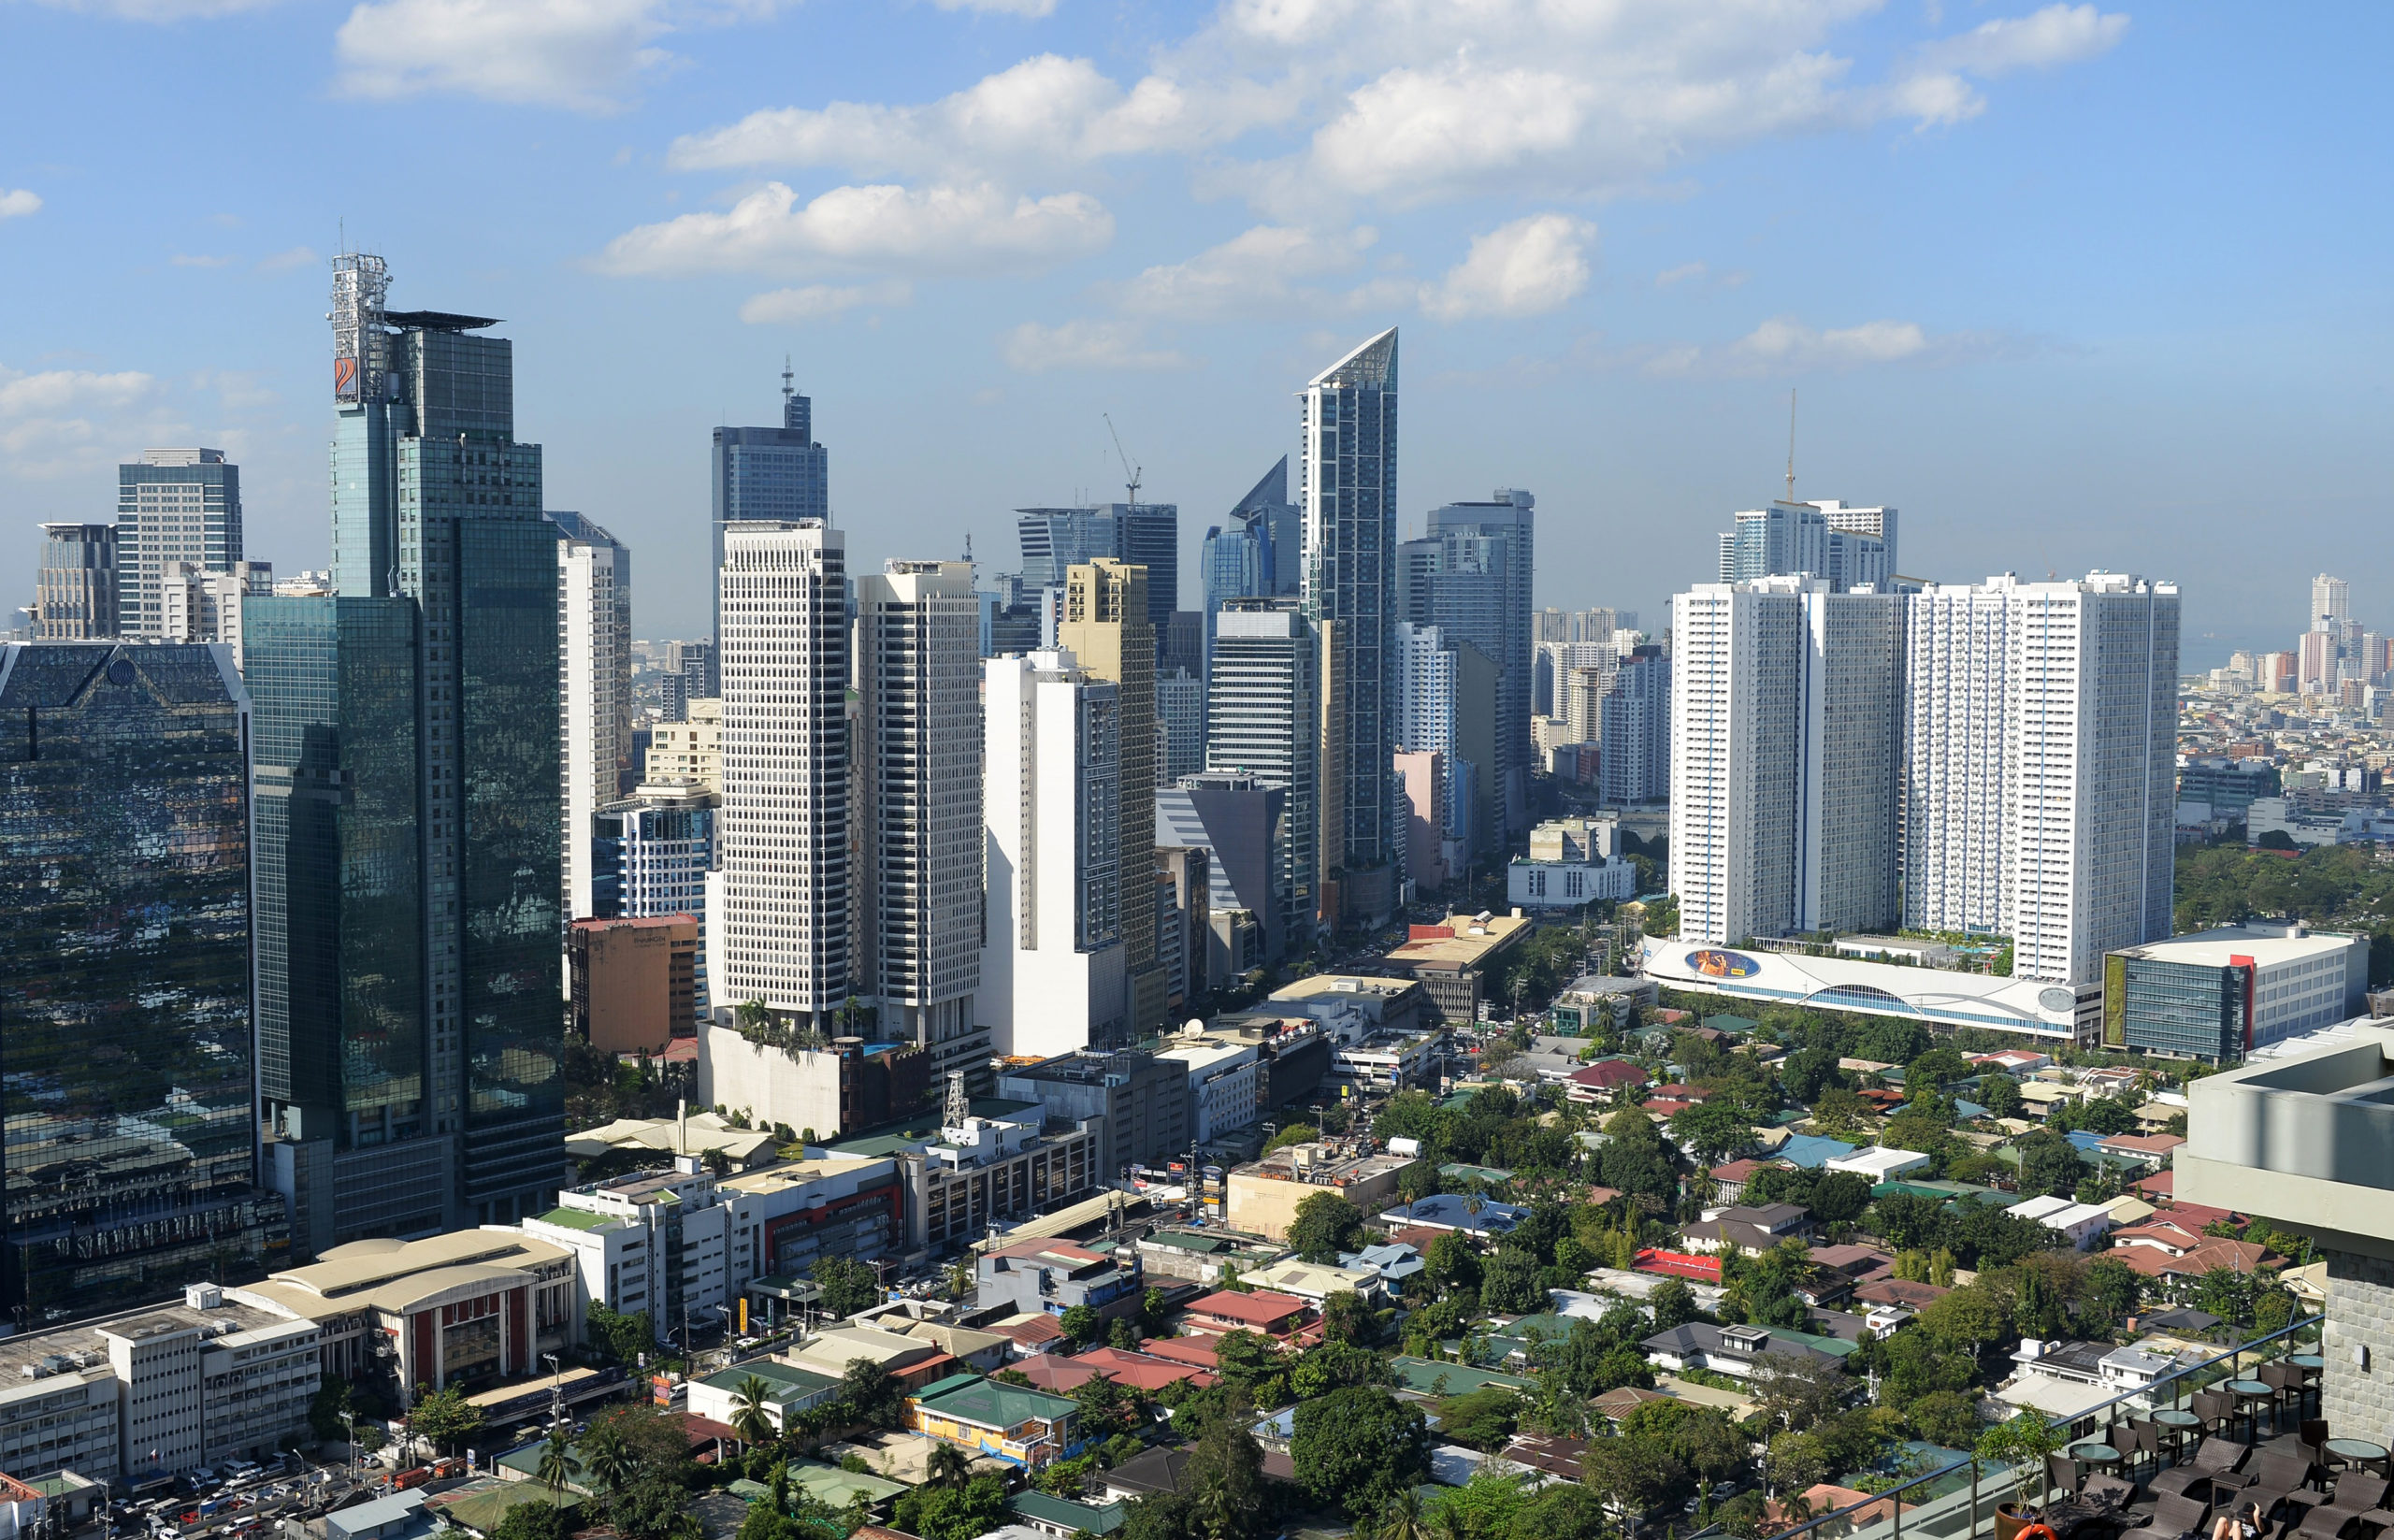

In [25]:
Image(filename='images/Insight 7.jpg')

### Q7. Which regions have the highest and lowest average income?

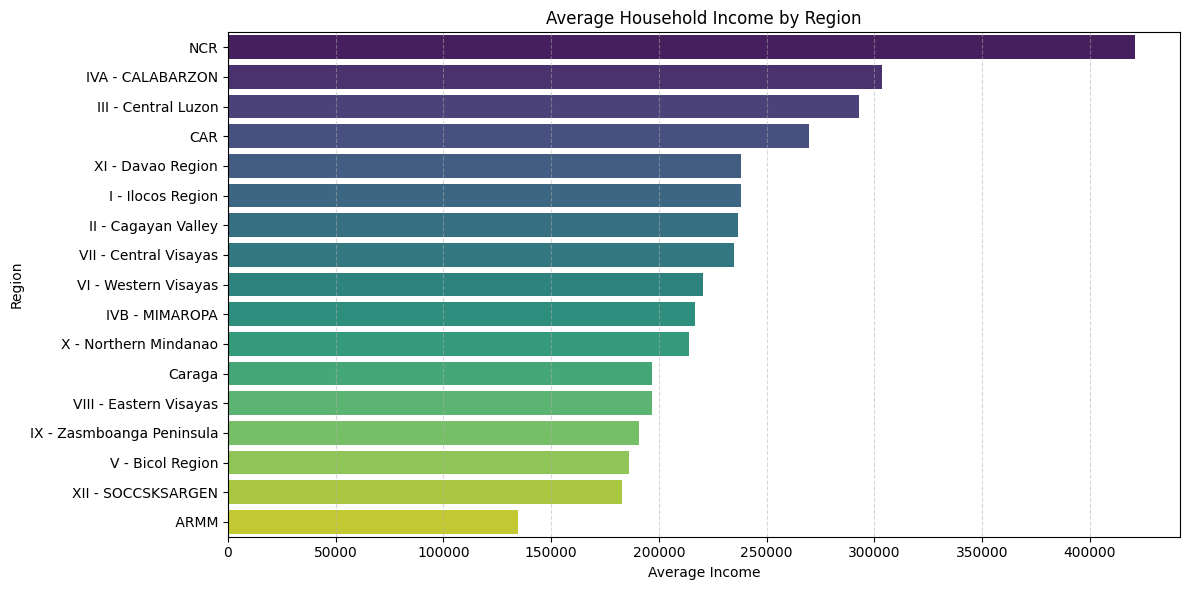

In [9]:
region_income_avg = income.groupby("Region")["Total Household Income"].mean().reset_index()
region_income_avg = region_income_avg.sort_values(by="Total Household Income", ascending=False)
region_income_avg

plt.figure(figsize=(12, 6))
sns.barplot(
    x="Total Household Income", 
    y="Region", 
    data=region_income_avg, 
    palette="viridis"
)
plt.title("Average Household Income by Region")
plt.xlabel("Average Income")
plt.ylabel("Region")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Insight 7
Regions like NCR, CALABARZON, and Central Luzon have the highest average household incomes, likely due to more job opportunities and urbanization. On the other hand, regions such as BARMM and Eastern Visayas show significantly lower average incomes, indicating limited economic activity and employment options in these areas.

<hr style="height:5px;border-width:0;color:gray;background-color:gray">

# Investing in Education
Education is an important long-term investment for families. We examine how much households spend on education across regions to see if income, access, or values influence this priority.

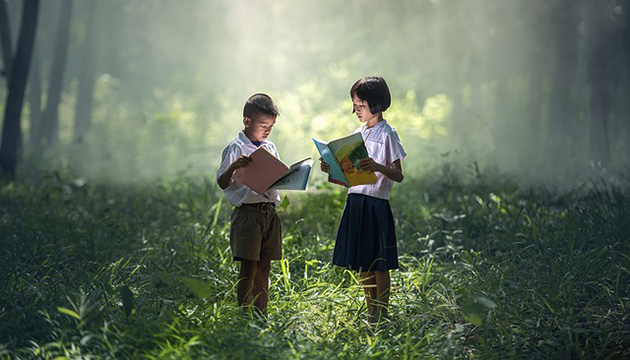

In [26]:
Image(filename='images/Insight 8.jpg')

### Q8. How much do households spend on education across different regions?

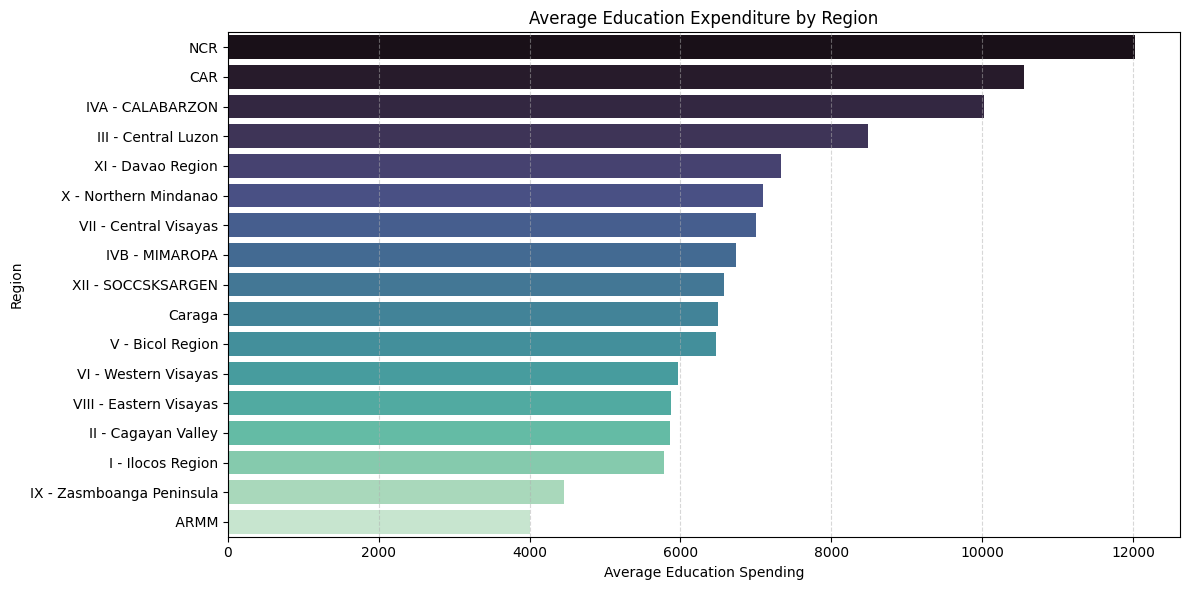

In [10]:
education_expense = income.groupby("Region")["Education Expenditure"].mean().reset_index()
education_expense = education_expense.sort_values(by="Education Expenditure", ascending=False)
education_expense

plt.figure(figsize=(12, 6))
sns.barplot(
    x="Education Expenditure", 
    y="Region", 
    data=education_expense, 
    palette="mako"
)
plt.title("Average Education Expenditure by Region")
plt.xlabel("Average Education Spending")
plt.ylabel("Region")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Insight 8:
Regions such as <b>NCR</b>, <b>CAR</b> and <b>Region IV-A</b> tend to spend more on education, possibly due to the availability of more private schools and higher educational standards. In contrast, regions like <b>BARMM and Region IX</b> have lower education expenditures, which may reflect accessibility or prioritization issues in schooling.

<hr style="height:5px;border-width:0;color:gray;background-color:gray">

# Does Income Affect What You Eat?
We continue analyzing whether higher income levels lead to greater food spending. This helps us understand priorities and budget allocations among Filipino households across different income brackets.

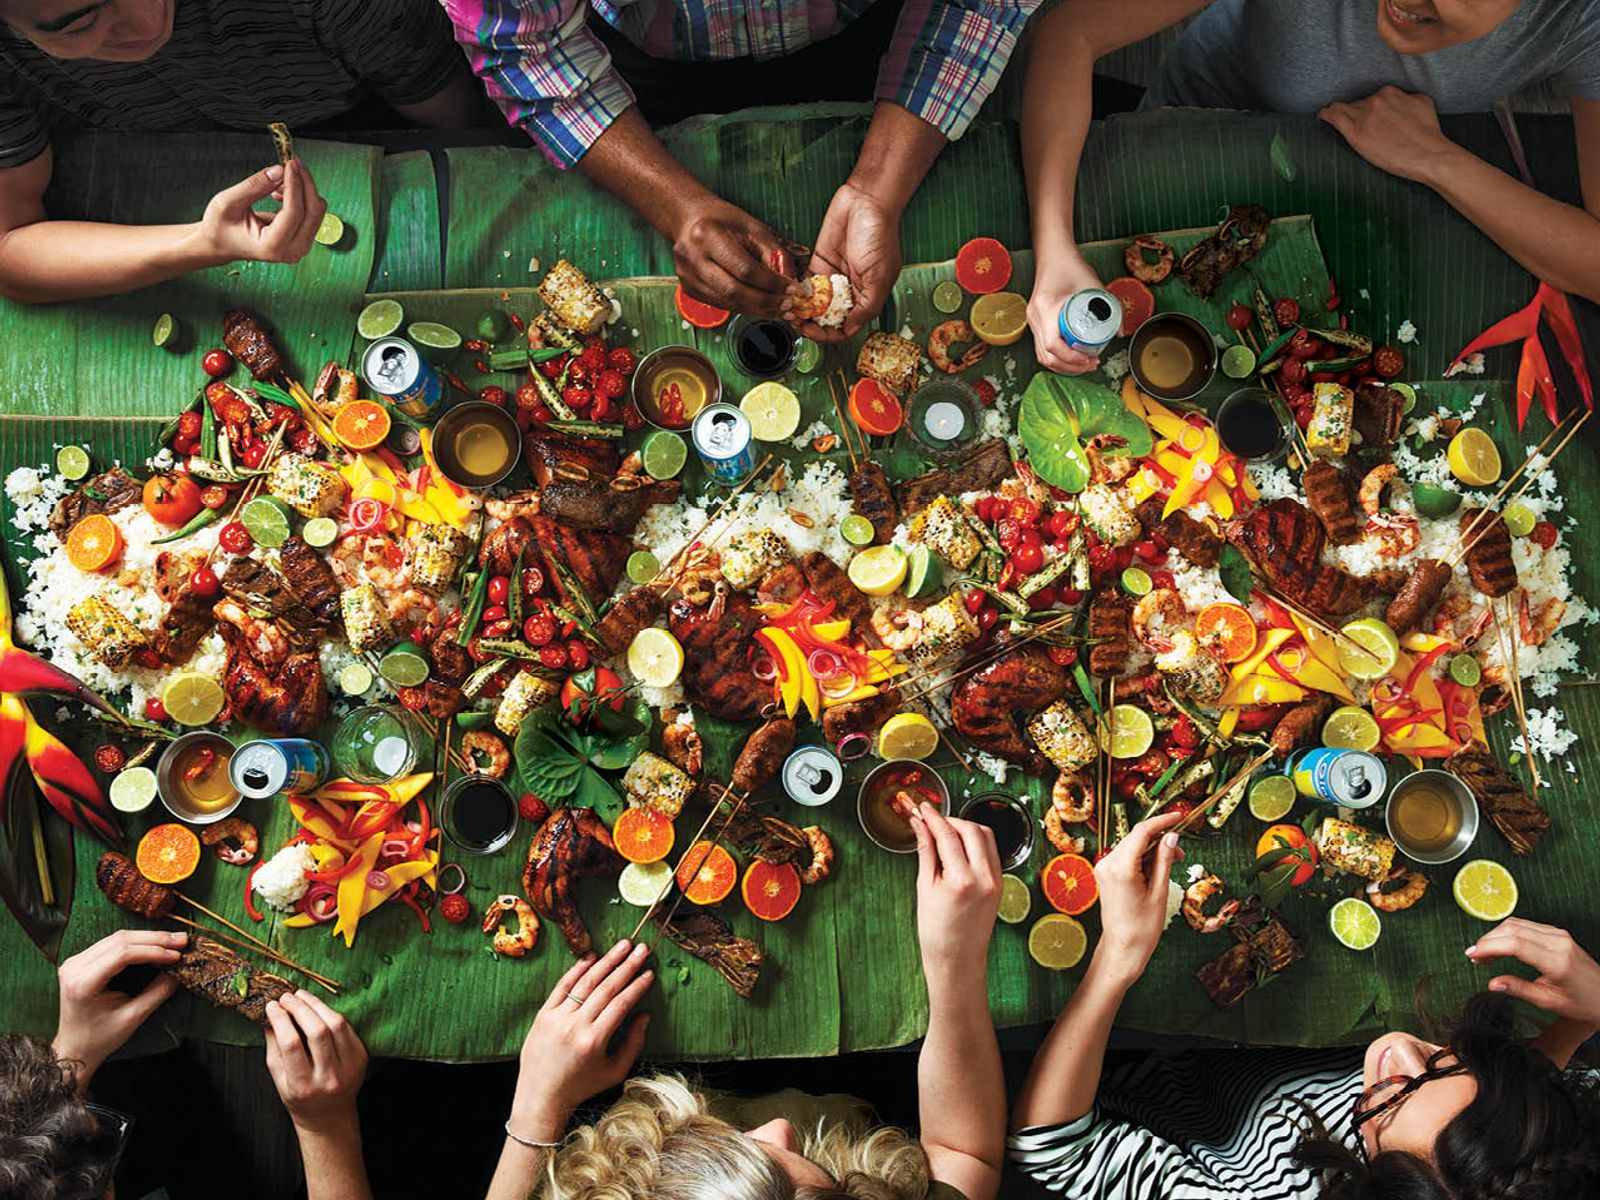

In [27]:
Image(filename='images/Insight 9.jpg')

### Q9. Is there a relationship between household income and food expenditure?

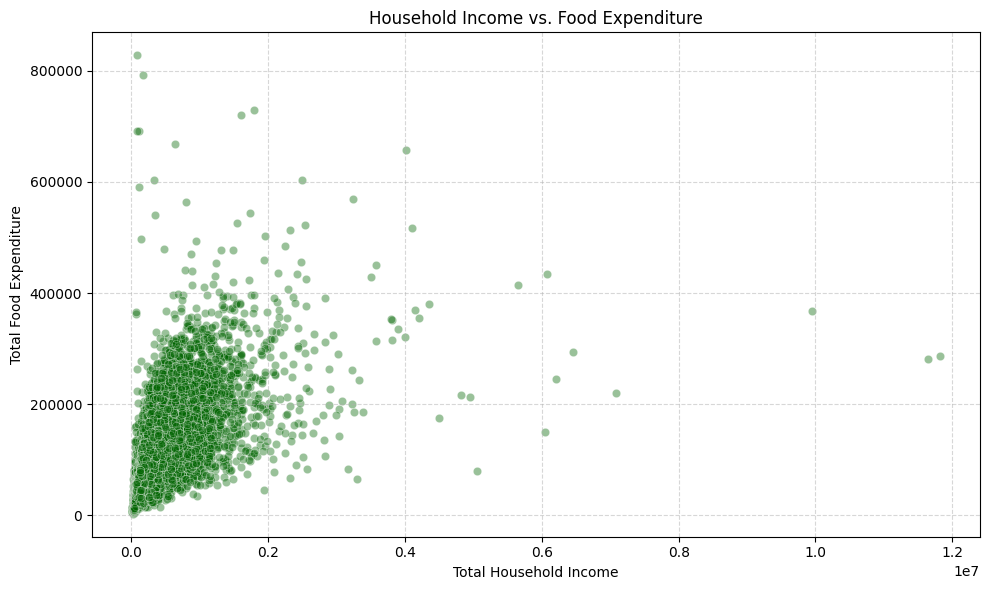

In [11]:

income_food = income[["Total Household Income", "Total Food Expenditure"]]
income_food

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="Total Household Income",
    y="Total Food Expenditure",
    data=income_food,
    alpha=0.4,
    color="darkgreen"
)
plt.title("Household Income vs. Food Expenditure")
plt.xlabel("Total Household Income")
plt.ylabel("Total Food Expenditure")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Insight 9:
There is a noticeable trend where households with lower income also spend more on food. However, there are outliers, some low-income households spend significantly on food, which may reflect larger household sizes or regional food pricing differences. This suggests that while income affects food expenditure, other factors play a role too.

<hr style="height:5px;border-width:0;color:gray;background-color:gray">

# In-demand Employment rate Region
Analyzing household employment status helps reveal its effect on income and spending, with higher employment rates often leading to greater income and increased spending on essentials like food, education, and healthcare.

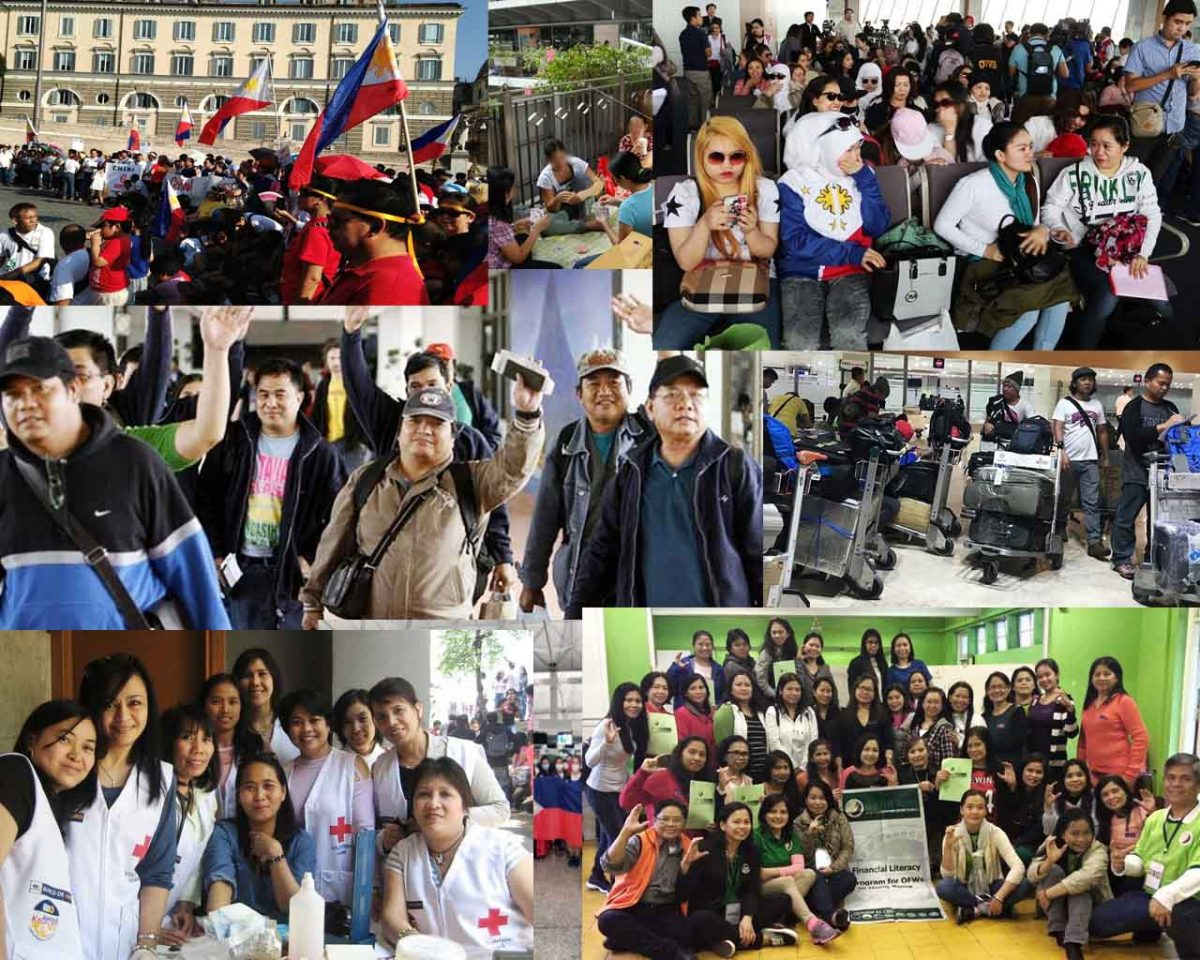

In [28]:
Image(filename='images/Insight 10.jpg')

### Q10: Employed Family Members Rate per region?

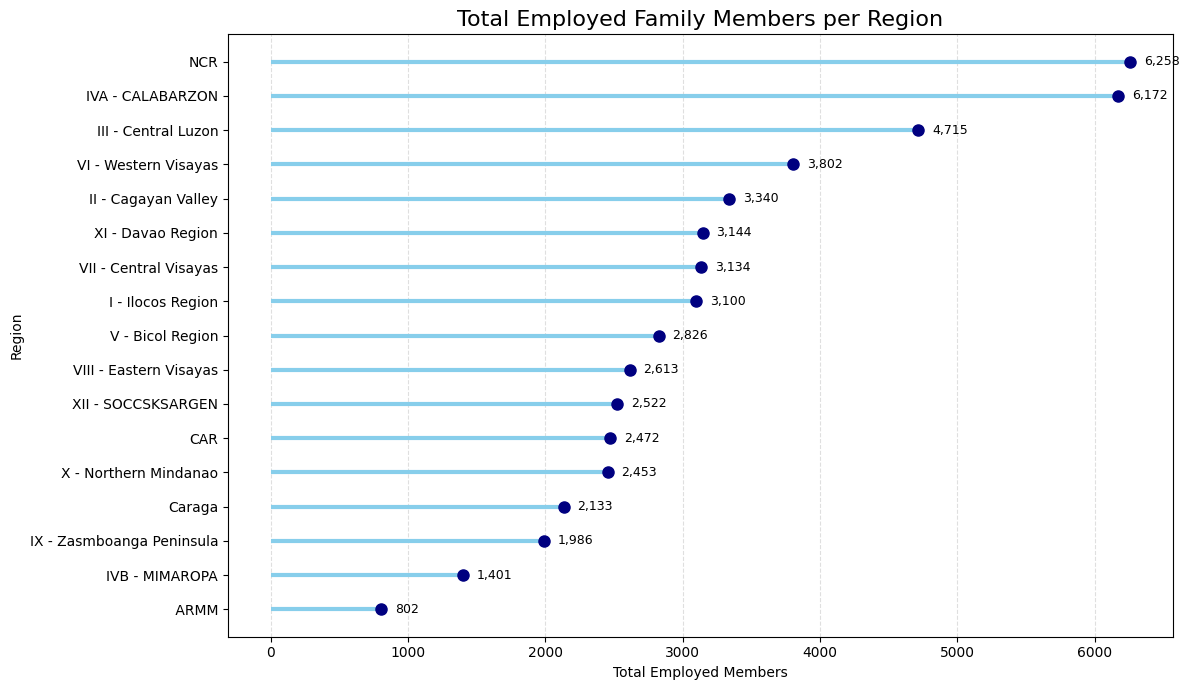

In [13]:
total_employed_per_region = (
    income.groupby('Region')['Total number of family members employed']
    .sum()
    .reset_index()
)

total_employed_per_region.columns = ['Region', 'Total_Employed_Members']

# Sort for visualization
data = total_employed_per_region.sort_values(by='Total_Employed_Members', ascending=True)
total_employed_per_region


# plotting
plt.figure(figsize=(12, 7))
plt.hlines(
    y=data['Region'],
    xmin=0,
    xmax=data['Total_Employed_Members'],
    color='skyblue',
    linewidth=3
)
plt.plot(
    data['Total_Employed_Members'],
    data['Region'],
    "o",
    markersize=8,
    color='navy'
)

for index, value in enumerate(data['Total_Employed_Members']):
    plt.text(value + 100, index, f"{value:,}", va='center', fontsize=9)

plt.title("Total Employed Family Members per Region", fontsize=16)
plt.xlabel("Total Employed Members")
plt.ylabel("Region")
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


### Insight 10: Regional Employment Distribution
NCR has the highest number of employed family members (6,258), likely driven by high urban density and job availability in commercial and industrial sectors.

CALABARZON (6,172) follows closely, supported by its expanding economic zones and strong manufacturing base.

In contrast, ARMM reports the lowest total employment (802), possibly reflecting limited access to formal employment, lower population, or ongoing economic development challenges.

<hr style="height:5px;border-width:0;color:gray;background-color:gray">

<h1>General Conclusion</h1>

The exploratory analysis of the **Family Income and Expenditure Survey (FIES)** data reveals significant patterns in the **income** and **spending behavior** of Filipino households. There are clear **regional disparities**, with urbanized areas such as the **National Capital Region (NCR)** reporting **higher average household incomes** and greater **spending**, particularly in areas like **education**, **food**, and **non-food necessities**. **Food** remains the **largest expense** across all regions, with **rice** being a staple item, underscoring the central role of **food security** in household budgeting. The data also indicates that **household income** tends to increase with the **number of family members**, likely due to multiple income earners, and that households with **higher educational investment** often demonstrate better financial capacity. Additionally, the **age of the household head** plays a role, with **middle-aged individuals** generally reporting higher incomes. **Spending behavior** further reveals that **higher-income households** allocate more to **non-essential categories**, while **lower-income families** prioritize **basic needs**. These findings offer valuable insights for developing targeted **social and economic policies**, particularly in the areas of **regional development**, **food affordability**, and **educational access**.
